<a href="https://colab.research.google.com/github/putualthea/RockPaperScissors-DicodingSubmission/blob/main/PutuAltheaPutri_RockPaperScissors_DicodingMLSubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBMISSION DICODING**


### Data Diri
Nama: PUTU ALTHEA PUTRI WIRADANI

Link Profile Dicoding: https://www.dicoding.com/users/putu_althea

Email: altheaowl@gmail.com


###1. Import Beberapa Library yang Dibutuhkan

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
plt.style.use('seaborn')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
%reload_ext tensorboard

import numpy as np
import pandas as pd
import os
import shutil
import zipfile

# ------ Menginisiasi fungsi Callbacks di awal ------
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nTelah mencapai accuracy sebesar >97% hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

###2. Mengunduh Zipfile RockPaperScissors dari Dicoding

*Assessement point 1*

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-11-04 09:24:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.77MB/s    in 42s     

2020-11-04 09:25:14 (7.31 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



###3. Extract Dataset berbentuk Zip File

In [ ]:
os.listdir('/content')

['.config', 'rockpaperscissors.zip', 'sample_data']

In [ ]:
from zipfile import ZipFile

nama_file = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(nama_file,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Berikut daftar folder yang terdapat pada dataset

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

Berikut banyaknya file gambar pada masing - masing folder rock, paper, dan scissors.

In [ ]:
print(len(os.listdir('/tmp/rockpaperscissors/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/scissors')))

712
726
750


###4. Overview gambar pada tiap-tiap folder

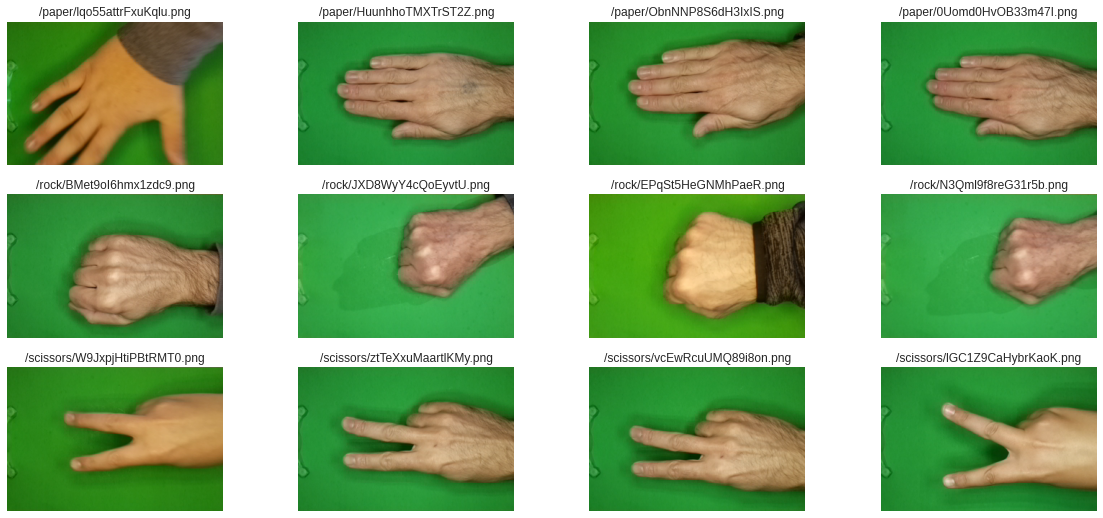

In [ ]:
TOTAL = 4                                                                        # Total penampilan gambar
index = np.random.randint(20)                                                    # Untuk mengambil sampel acak

plt.figure(figsize=(5*TOTAL, 9))

list_paper = [os.path.join('/tmp/rockpaperscissors/paper', name) for name in os.listdir('/tmp/rockpaperscissors/paper')[index:index+TOTAL]]
list_rock = [os.path.join('/tmp/rockpaperscissors/rock', name) for name in os.listdir('/tmp/rockpaperscissors/rock')[index:index+TOTAL]]
list_scissors = [os.path.join('/tmp/rockpaperscissors/scissors', name) for name in os.listdir('/tmp/rockpaperscissors/scissors')[index:index+TOTAL]]

for i, path in enumerate(list_paper+list_rock+list_scissors):
  plt.subplot(3, TOTAL, i+1)
  plt.axis('off')

  plt.title(path.replace('/tmp/rockpaperscissors', ''))
  img = plt_image.imread(path)
  plt.imshow(img)

Dapat dilihat bahwa pada overview gambar dengan ukuran (20,9) dalam inchi ini menampilkan beragam gambar tangan membentuk gunting, batu, dan kertas pada background hijau

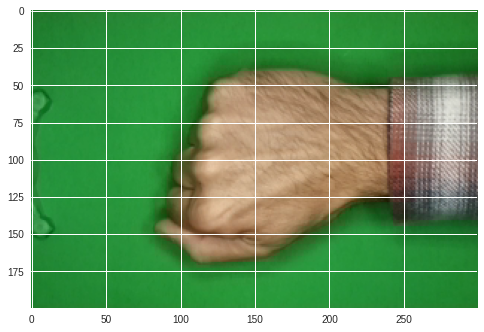

(200, 300, 3)


In [ ]:
preview = plt_image.imread('/tmp/rockpaperscissors/rock/01dM3ewPIsnBICu1.png')
plt.imshow(preview)
plt.show()
print(preview.shape)

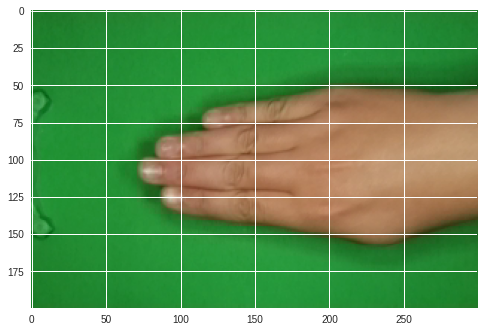

(200, 300, 3)


In [ ]:
preview = plt_image.imread('/tmp/rockpaperscissors/paper/0cb6cVL8pkfi4wF6.png')
plt.imshow(preview)
plt.show()
print(preview.shape)

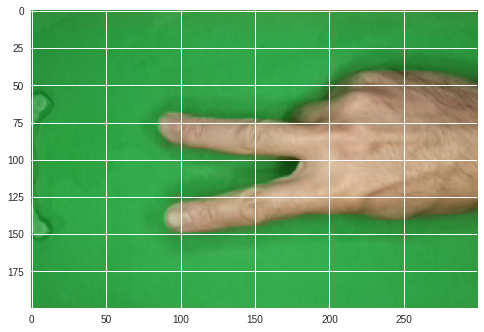

(200, 300, 3)


In [ ]:
preview = plt_image.imread('/tmp/rockpaperscissors/scissors/1jKhi65BPTLXnUI6.png')
plt.imshow(preview)
plt.show()
print(preview.shape)

Dari overview gambar diatas dapat diketahui bahwa ukuran dataset ini adalah 200x300 dengan color profile RGB (3) nantinya ukuran ini akan berguna untuk menentukan target size yang dibutuhkan

###5. Membuat Direktori Baru untuk Train dan Validation Data

In [ ]:
#membuat nama direktori untuk train dan validation
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#define path untuk train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
#membuat nama direktori tiap data paper rock scissor
paper_dir = os.path.join(base_dir,'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

**Memecah data di direktori paper rock scissors menjadi train dan validation data**

*Assessement point 2*

In [ ]:
#SPLIT THE DATA
from sklearn.model_selection import train_test_split

#Split train and validation data untuk paper dengan test_size 40% dari total dataset
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4, random_state= 42)

#Split train and validation data for rock dengan test_size 40% dari total dataset
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4, random_state= 42)

#Split train and validation data for scissors test_size 40% dari total dataset
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4, random_state= 42)

Disini saya membuat test_size sebesar 0.4 mengingat bahwa banyak file yang harus diambil tiap folder untuk train dan validation adalah 40% dari keseluruhan masing-masing sampel

In [ ]:
# MEMBUAT DIREKTORI TIAP DATASET UNTUK DATA TRAINING
# membuat direktori paper pada direktori data training
train_paper = os.path.join(train_dir, 'paper')
# membuat direktori rock pada direktori data training
train_rock = os.path.join(train_dir, 'rock')
# membuat direktori scissors pada direktori data training
train_scissors = os.path.join(train_dir, 'scissors')
 
# MEMBUAT DIREKTORI TIAP DATASET UNTUK DATA VALIDATSI 
# membuat direktori paper pada direktori data validasi
validation_paper = os.path.join(validation_dir, 'paper')
# membuat direktori rock pada direktori data validasi
validation_rock = os.path.join(validation_dir, 'rock')
# membuat direktori scissors berantakan pada direktori data validasi
validation_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
# membuat directory baru pada direktori train
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

# membuat directory baru pada direktori validation
if not os.path.exists(validation_paper):
  os.mkdir(validation_paper)
if not os.path.exists(validation_rock):
  os.mkdir(validation_rock)
if not os.path.exists(validation_scissors):
  os.mkdir(validation_scissors)

In [ ]:
# mengcopy data train ke directory baru menggunakan Shutil
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(train_rock,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

# mengcopy data validation ke directory baru menggunakan Shutil
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(validation_paper,i))
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(validation_rock,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors,i))

**Dibawah ini menampilkan banyaknya jumlah file pada tiap direktori train pada masing-masing paper rock scissors yang berjumlah 40% dari total data train sebanyak 1314 sampel.**

*Assessement Point 3*

In [ ]:
print(len(os.listdir('/tmp/rockpaperscissors/train/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/train/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/train/scissors')))

427
435
450


Dibawah ini menampilkan banyaknya jumlah file pada tiap direktori train pada masing-masing paper rock scissors yang berjumlah 40% dari total data validation sebanyak 874 sampel. 

In [ ]:
print(len(os.listdir('/tmp/rockpaperscissors/val/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/val/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/val/scissors')))

285
291
300


###6. Image Preprocessing

Menggunakan **image datagen** untuk **augmentasi gambar** dari Keras ImageDataGenerator

*Assessement Point 4*

*Assessement Point 5*

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_gen = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(200, 300),  
        batch_size=64,
        class_mode='categorical') #lebih dari 2 kelas
 
validation_gen = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(200, 300), 
        batch_size=64,
        class_mode='categorical') #lebih dari 2 kelas

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


###7. Menambahkan Model Dasar Sequential pada Program

*Assessement Point 6*

In [ ]:
model_base = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape= (200,300,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(150, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model_base.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model_base.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 46, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 23, 35, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 21, 33, 128)     

In [ ]:
hist_model = model_base.fit(
      train_gen,
      epochs=20, 
      steps_per_epoch=int(1312/64),  
      validation_data=validation_gen, 
      validation_steps=int(876/64),
      callbacks=[callbacks],
      verbose=1
      )

Epoch 1/20
20/20 [==============================] - 107s 5s/step - loss: 1.1017 - accuracy: 0.3822 - val_loss: 1.0772 - val_accuracy: 0.3425
Epoch 2/20
20/20 [==============================] - 107s 5s/step - loss: 0.8437 - accuracy: 0.6426 - val_loss: 0.6245 - val_accuracy: 0.7488
Epoch 3/20
20/20 [==============================] - 107s 5s/step - loss: 0.5142 - accuracy: 0.7933 - val_loss: 0.3813 - val_accuracy: 0.8654
Epoch 4/20
20/20 [==============================] - 107s 5s/step - loss: 0.3054 - accuracy: 0.8950 - val_loss: 0.2409 - val_accuracy: 0.9231
Epoch 5/20
20/20 [==============================] - 106s 5s/step - loss: 0.2269 - accuracy: 0.9255 - val_loss: 0.2203 - val_accuracy: 0.9219
Epoch 6/20
20/20 [==============================] - 108s 5s/step - loss: 0.1982 - accuracy: 0.9320 - val_loss: 0.1912 - val_accuracy: 0.9291
Epoch 7/20
20/20 [==============================] - 105s 5s/step - loss: 0.1981 - accuracy: 0.9263 - val_loss: 0.1802 - val_accuracy: 0.9411
Epoch 8/20
20

Berhasil mencapai akurasi >97% yaitu 97.8% sehingga **callbacks** akan menghentikan training secara otomatis. Proses ini memakan waktu 28 menit, waktu yang dibutuhkan agak lama karena target size gambar yang saya tentukan cukup besar yaitu (200,300)

*Assessement Point 9*

###8. Membuat Visualisasi Akurasi Data dalam Grafik

Disini saya membuat visualisasi akurasi data berdasarkan base model yang saya buat

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
# menampilkan grafik
def plot(hist):
  history = hist.history
  history['epoch'] = hist.epoch

  plt.figure(figsize=(15, 6))

  plt.subplot(1, 2, 1)
  plt.ylabel('Loss', fontsize=14)
  plt.plot(history['epoch'], history['loss'], label='Loss')
  plt.plot(history['epoch'], history['val_loss'], label='Val Loss', color='red')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.ylabel('Accuracy', fontsize=14)
  plt.plot(history['epoch'], history['accuracy'], label='Acc')
  plt.plot(history['epoch'], history['val_accuracy'], label='Val Acc', color='red')
  plt.legend()

  return plt.show()

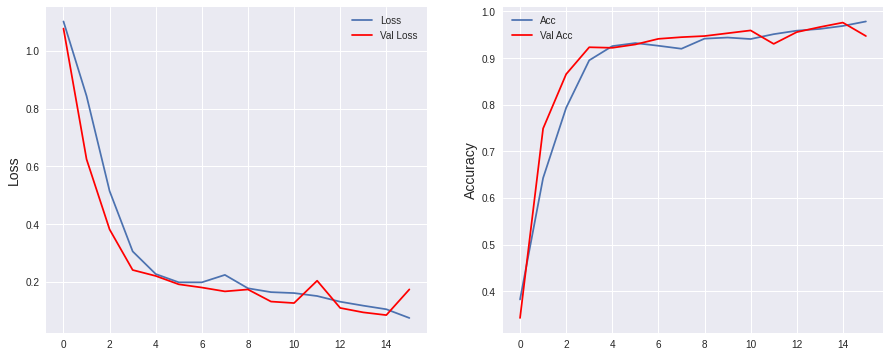

In [ ]:
plot(hist_model)

Dari grafik tersebut dapat terlihat bahwa prediksi model cukup baik meskipun terdapat beberapa kali overfitting namun tetap stabil

###9. Memprediksi Gambar yang Diunggah ke Colab

*Assessement Point 10*

Saving 1jKhi65BPTLXnUI6.png to 1jKhi65BPTLXnUI6.png
1jKhi65BPTLXnUI6.png
scissors


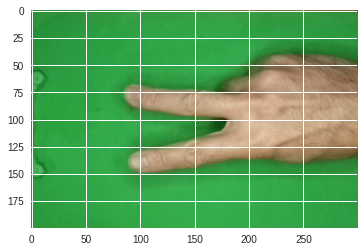

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model_base.predict(images, batch_size=64)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Dari hasil prediksi tersebut dapat disimpulkan bahwa prediksi model cukup akurat untuk mengetahui bahwa gambar tersebut adalah gunting atau scissors, selain itu saya juga sudah mencoba dengan beberapa gambar lain dan hasilnya sudah cocok semua.